# Challenge

* Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.
* In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

## Importing Necessary Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv('real_estate.csv')
data.sample(10)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
180,2012.667,26.9,4449.2700,0,24.94898,121.49621,15.5
409,2013.000,13.7,4082.0150,0,24.94155,121.50381,15.4
214,2013.583,18.1,1783.1800,3,24.96731,121.51486,20.9
47,2013.583,35.9,640.7391,3,24.97563,121.53715,61.5
118,2013.500,25.3,1583.7220,3,24.96622,121.51709,30.6
98,2013.417,16.4,289.3248,5,24.98203,121.54348,51.0
37,2013.167,12.0,1360.1390,1,24.95204,121.54842,25.3
63,2013.583,2.6,533.4762,4,24.97445,121.54765,55.0
310,2013.583,16.4,1643.4990,2,24.95394,121.55174,24.7
324,2012.667,12.4,1712.6320,2,24.96412,121.51670,31.3


The data consists of the following variables:

* `transaction_date` - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* `house_age` - the house age (in years)
* `transit_distance` - the distance to the nearest light rail station (in meters)
* `local_convenience_stores` - the number of convenience stores within walking distance
* `latitude` - the geographic coordinate, latitude
* `longitude` - the geographic coordinate, longitude
* `price_per_unit` - house price of unit area (3.3 square meters)

* Identify predictive features that will help to predict `price_per_unit`.
* The model should have lowest RMSE.

## View Label Distribution

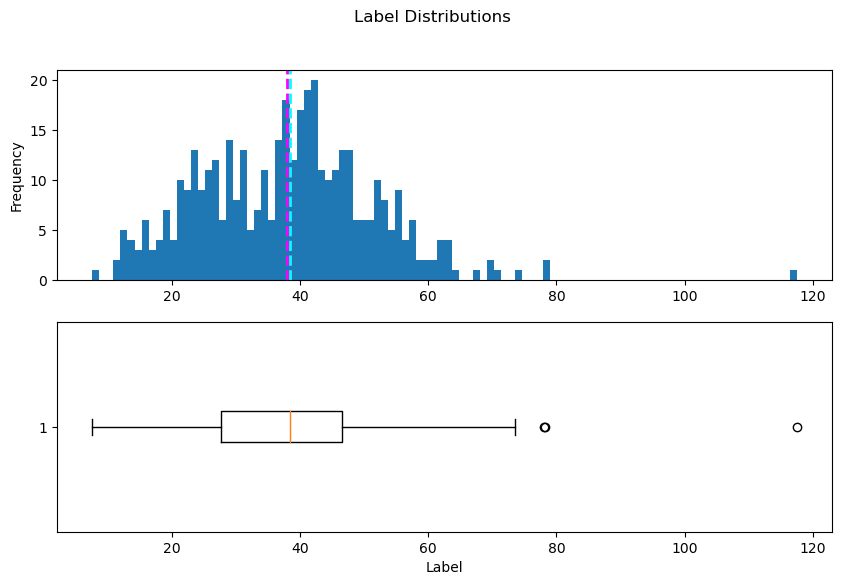

In [36]:
label = data[data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig,ax  =plt.subplots(2,1, figsize=(10,6))

# Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the Boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

fig.suptitle('Label Distributions')
fig.show()

## Remove Outliers

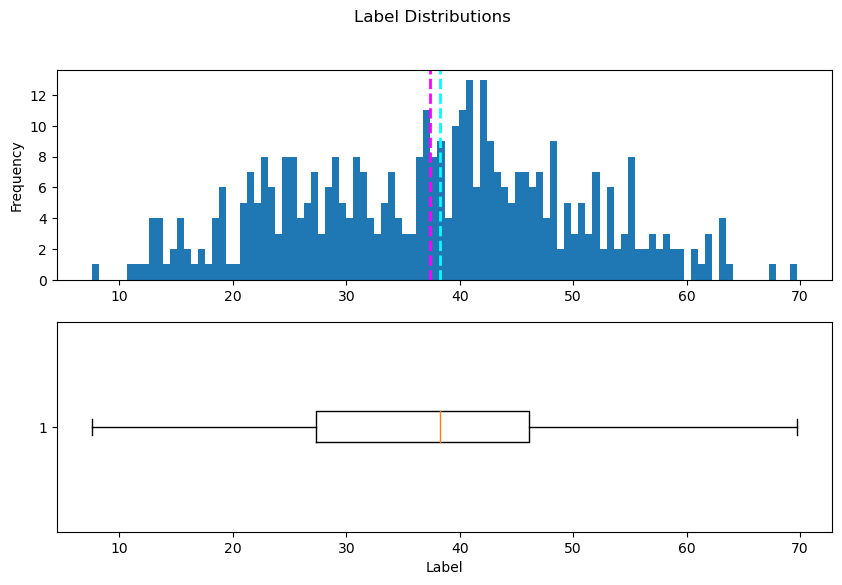

In [37]:
data = data[data['price_per_unit'] < 70]

# Get the label column
label = data[data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig,ax  =plt.subplots(2,1, figsize=(10,6))

# Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the Boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

fig.suptitle('Label Distributions')
fig.show()

## View Numeric Correlations

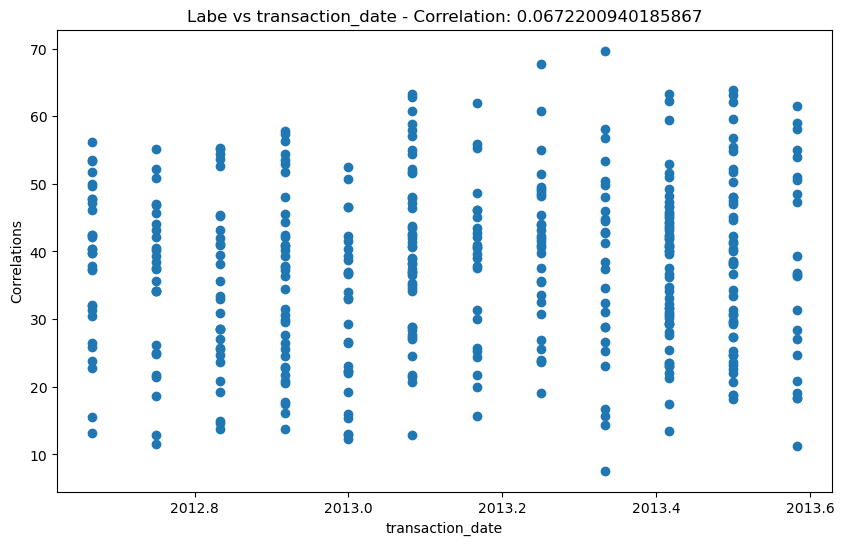

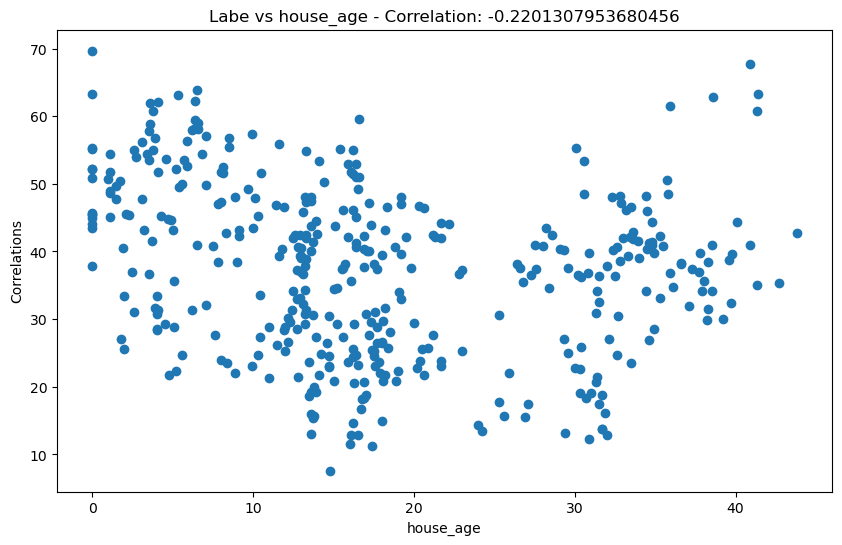

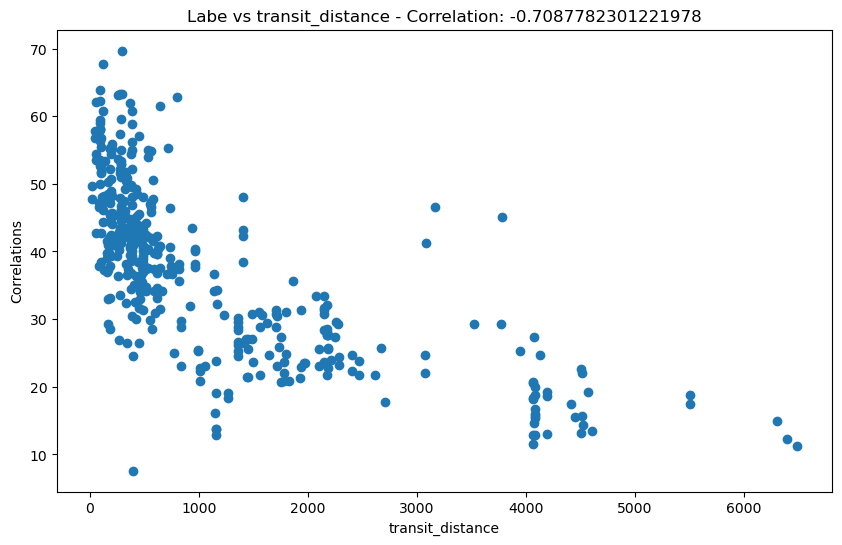

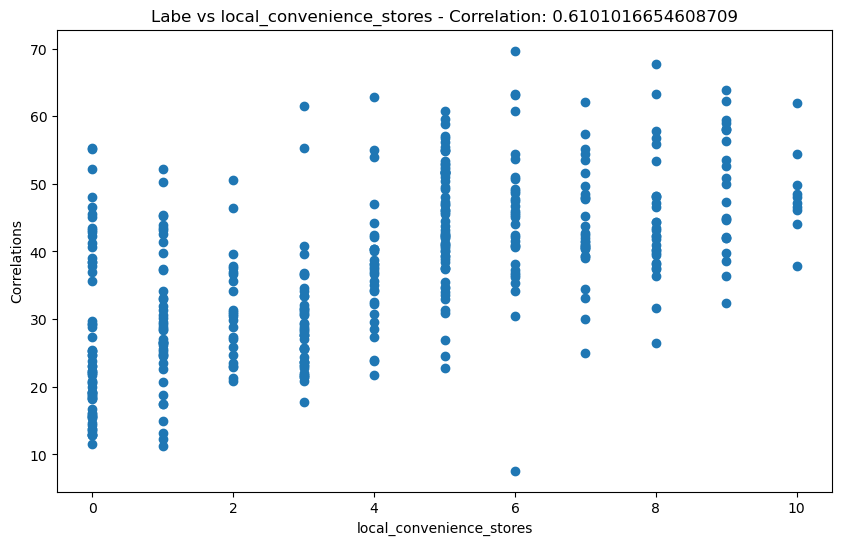

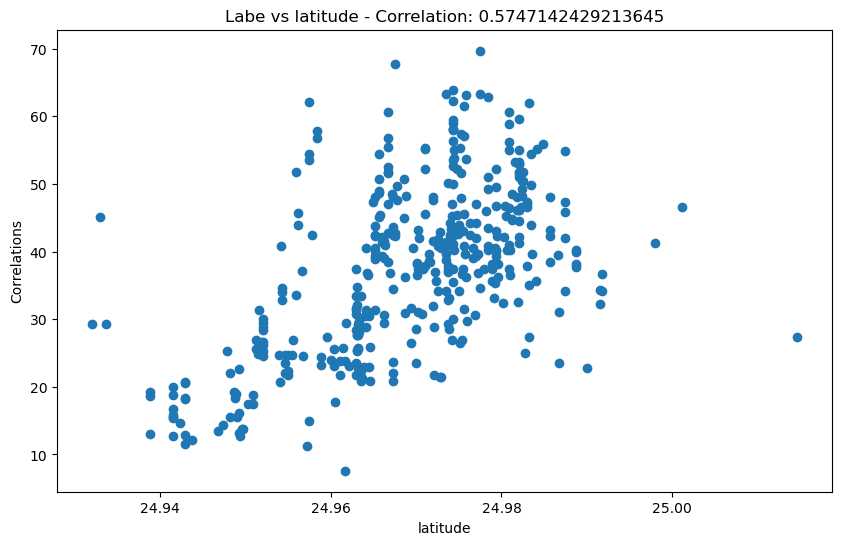

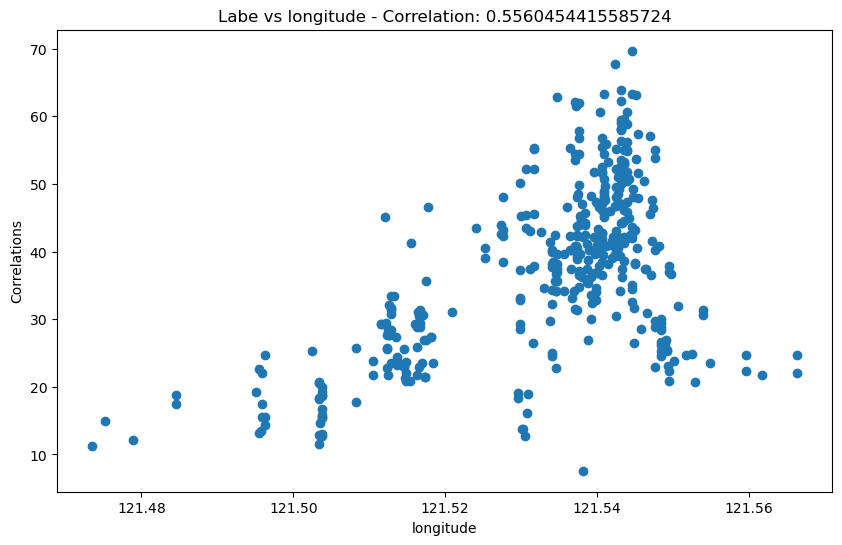

In [38]:
for col in data[data.columns[0:-1]]:
        fig = plt.figure(figsize=(10,6))
        ax = fig.gca()
        feature = data[col]
        correlation = feature.corr(label)
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel('Correlations')
        ax.set_title('Labe vs ' + col + ' - Correlation: ' + str(correlation))
plt.show()

## View Categorical Features

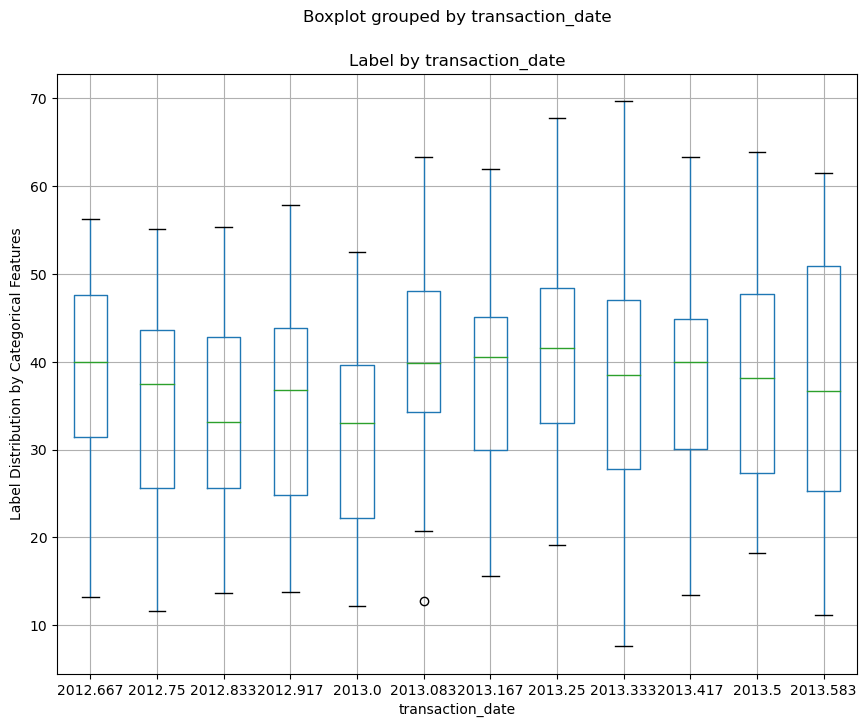

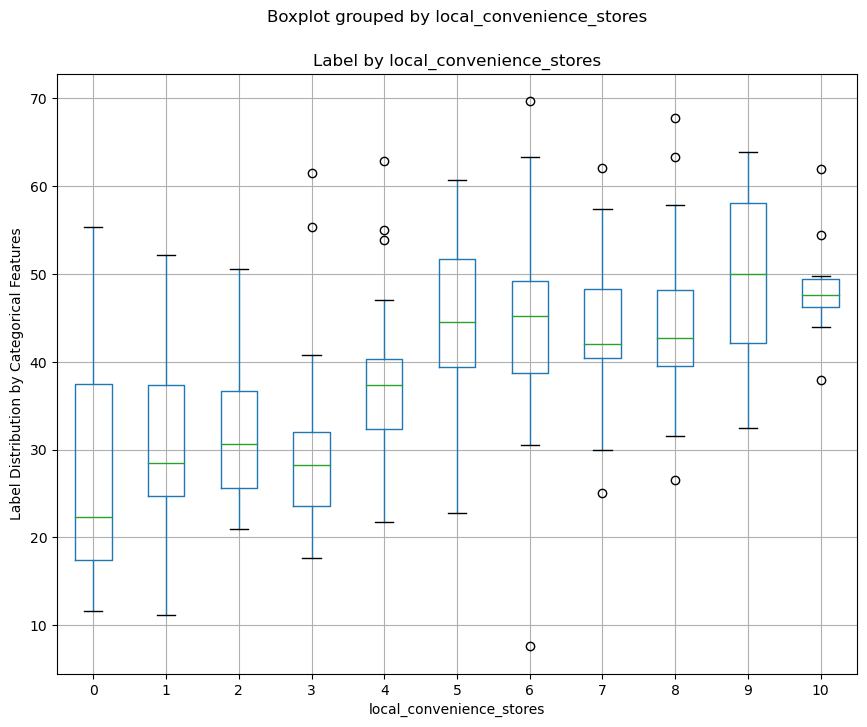

In [39]:
# Plot the boxplot for the label by each categorical feaature

for col in data[['transaction_date','local_convenience_stores']]:
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax=ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Features")
plt.show()

## Separate features and label and split data for training and validation
(`transaction_date` doesn't seem to be very predictive, so omit it)

In [40]:
from sklearn.model_selection import train_test_split

X, y = data[data.columns[0:-1]].values, data[data.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(f'Training Set: {X_train.shape[0]} rows\nTest Set: {X_test.shape[0]} rows')

Training Set: 285 rows
Test Set: 123 rows


## Preprocess the data and train a model in a pipeline
* Normalize the numeric features, then use a RandomForestRegressor to train a model.

In [41]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

In [42]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


In [43]:
# Fit the pipeline to train a linear regression model on training set

model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


## Evaluate the model

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Get predictions
predictions = model.predict(X_test)

# Display Metrics
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

r2 = r2_score(y_test, predictions)
print('R2 Score: ', r2)

MSE:  35.61451711010206
RMSE:  5.967789968665289
R2 Score:  0.6960997168202536


## Plot Predicted vs Actual

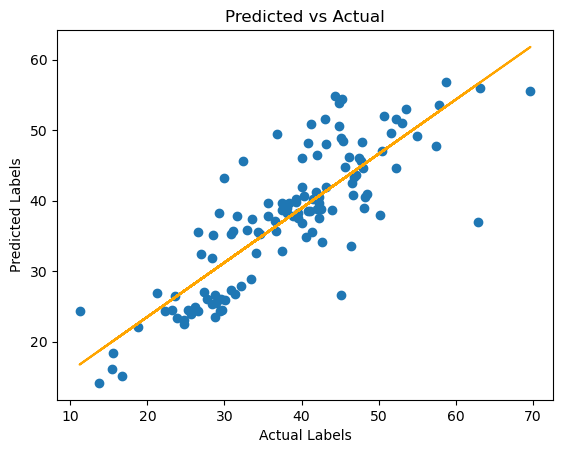

In [49]:
## Plot Predicted vs Actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted vs Actual')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), color='orange')
plt.show()

## Saving the trained model

In [46]:
import joblib

filename = './real_estate_model.pkl'
joblib.dump(model, filename)

['./real_estate_model.pkl']

## Doing predictions on new data

In [48]:
# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348],
                  [2013.000,13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
48.08
16.09
